In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import folium
import re

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud

from datetime import datetime
import time

##### 폰트를 NanumBarunpenB로 설정해주자

In [2]:
font_path = 'C:/windows/fonts/NanumBarunpenB.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [3]:
# 글자 선명
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")

C:\Users\admin\AppData\Local\Temp\ipykernel_13744\141453295.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


#### 주유소 위경도 csv 파일 불러오기

In [4]:
df = pd.read_csv('./data/주유소 위경도.csv', encoding='utf-8')
df.head()

,상호,주소,Unnamed: 2
0,(주)개금태화주유소,부산 부산진구 가야대로 402,"X :129.016910, Y :35.1514817"
1,(주)경인석유,부산 남구 신선로 448 (용당동),"X :129.100468, Y :35.1248122"
2,(주)경인에너지,부산 강서구 생곡로 40 (녹산동),"X :128.897647, Y :35.1248039"
3,(주)고리길천주유소,부산 기장군 장안읍 해맞이로 487,"X :129.289381, Y :35.3315196"
4,(주)나부코직영 우원주유소,부산 영도구 태종로 181 (봉래동4가),"X :129.047706, Y :35.0948319"


#### 컬럼 값이 없는 것을 위경도로 설정해준다, 값이 없는 392,393 행 제거 

In [5]:
df.rename(columns={'Unnamed: 2' : '위경도'}, inplace=True)
df = df.drop(index=392, axis=0)
df = df.drop(index=393, axis=0)
df

,상호,주소,위경도
0,(주)개금태화주유소,부산 부산진구 가야대로 402,"X :129.016910, Y :35.1514817"
1,(주)경인석유,부산 남구 신선로 448 (용당동),"X :129.100468, Y :35.1248122"
2,(주)경인에너지,부산 강서구 생곡로 40 (녹산동),"X :128.897647, Y :35.1248039"
3,(주)고리길천주유소,부산 기장군 장안읍 해맞이로 487,"X :129.289381, Y :35.3315196"
4,(주)나부코직영 우원주유소,부산 영도구 태종로 181 (봉래동4가),"X :129.047706, Y :35.0948319"
...,...,...,...
387,SK에너지(주)신광셀프주유소,부산 북구 덕천로 275 (만덕동),"X :129.034087, Y :35.2098781"
388,SK에너지(주)신도시주유소,부산 해운대구 대천로 82 (좌동),"X :129.171720, Y :35.1735968"
389,SK에너지(주)직영 태종로주유소,부산 영도구 태종로 290 (청학동),"X :129.057642, Y :35.0979530"
390,SK에너지(주)직영 해운대센텀주유소,부산 해운대구 수영강변대로 276,"X :129.119134, Y :35.1835484"


##### 위경도 컬럼에서의 값들을 ,로 둘로 나누고 i번째의 경도 컬럼에 넣어준다

#### 경도 컬럼에 위경도의 값들을 ,로 둘로 나누고 i번째의 0번째의 값을 가져온다

In [6]:
df['경도'] = 0

for i in df.index:
    df['경도'][i] = df['위경도'].str.split(',')[i][0]

df

C:\Users\admin\AppData\Local\Temp\ipykernel_13744\2673356394.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['경도'][i] = df['위경도'].str.split(',')[i][0]


,상호,주소,위경도,경도
0,(주)개금태화주유소,부산 부산진구 가야대로 402,"X :129.016910, Y :35.1514817",X :129.016910
1,(주)경인석유,부산 남구 신선로 448 (용당동),"X :129.100468, Y :35.1248122",X :129.100468
2,(주)경인에너지,부산 강서구 생곡로 40 (녹산동),"X :128.897647, Y :35.1248039",X :128.897647
3,(주)고리길천주유소,부산 기장군 장안읍 해맞이로 487,"X :129.289381, Y :35.3315196",X :129.289381
4,(주)나부코직영 우원주유소,부산 영도구 태종로 181 (봉래동4가),"X :129.047706, Y :35.0948319",X :129.047706
...,...,...,...,...
387,SK에너지(주)신광셀프주유소,부산 북구 덕천로 275 (만덕동),"X :129.034087, Y :35.2098781",X :129.034087
388,SK에너지(주)신도시주유소,부산 해운대구 대천로 82 (좌동),"X :129.171720, Y :35.1735968",X :129.171720
389,SK에너지(주)직영 태종로주유소,부산 영도구 태종로 290 (청학동),"X :129.057642, Y :35.0979530",X :129.057642
390,SK에너지(주)직영 해운대센텀주유소,부산 해운대구 수영강변대로 276,"X :129.119134, Y :35.1835484",X :129.119134


##### 위도 컬럼에 위경도의 값들을 ,로 둘로 나누고 i번째의 0번째의 값을 가져온다

In [7]:
df['위도'] = 0

for i in df.index:
    df['위도'][i] = (df['위경도'].str.split(',')[i][1])
df

C:\Users\admin\AppData\Local\Temp\ipykernel_13744\3340694080.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['위도'][i] = (df['위경도'].str.split(',')[i][1])


,상호,주소,위경도,경도,위도
0,(주)개금태화주유소,부산 부산진구 가야대로 402,"X :129.016910, Y :35.1514817",X :129.016910,Y :35.1514817
1,(주)경인석유,부산 남구 신선로 448 (용당동),"X :129.100468, Y :35.1248122",X :129.100468,Y :35.1248122
2,(주)경인에너지,부산 강서구 생곡로 40 (녹산동),"X :128.897647, Y :35.1248039",X :128.897647,Y :35.1248039
3,(주)고리길천주유소,부산 기장군 장안읍 해맞이로 487,"X :129.289381, Y :35.3315196",X :129.289381,Y :35.3315196
4,(주)나부코직영 우원주유소,부산 영도구 태종로 181 (봉래동4가),"X :129.047706, Y :35.0948319",X :129.047706,Y :35.0948319
...,...,...,...,...,...
387,SK에너지(주)신광셀프주유소,부산 북구 덕천로 275 (만덕동),"X :129.034087, Y :35.2098781",X :129.034087,Y :35.2098781
388,SK에너지(주)신도시주유소,부산 해운대구 대천로 82 (좌동),"X :129.171720, Y :35.1735968",X :129.171720,Y :35.1735968
389,SK에너지(주)직영 태종로주유소,부산 영도구 태종로 290 (청학동),"X :129.057642, Y :35.0979530",X :129.057642,Y :35.0979530
390,SK에너지(주)직영 해운대센텀주유소,부산 해운대구 수영강변대로 276,"X :129.119134, Y :35.1835484",X :129.119134,Y :35.1835484


##### 경도, 위도 컬럼 값들중 필요없는 (X :, Y :)을 공백으로 변환

In [8]:
df['경도'] = df['경도'].str.replace('X :', '')
df['위도'] = df['위도'].str.replace('Y :', '')
df.head()

,상호,주소,위경도,경도,위도
0,(주)개금태화주유소,부산 부산진구 가야대로 402,"X :129.016910, Y :35.1514817",129.016910,35.1514817
1,(주)경인석유,부산 남구 신선로 448 (용당동),"X :129.100468, Y :35.1248122",129.100468,35.1248122
2,(주)경인에너지,부산 강서구 생곡로 40 (녹산동),"X :128.897647, Y :35.1248039",128.897647,35.1248039
3,(주)고리길천주유소,부산 기장군 장안읍 해맞이로 487,"X :129.289381, Y :35.3315196",129.289381,35.3315196
4,(주)나부코직영 우원주유소,부산 영도구 태종로 181 (봉래동4가),"X :129.047706, Y :35.0948319",129.047706,35.0948319


##### 위경도 컬럼 제거

In [9]:
df = df.drop(columns='위경도')
df.head()

,상호,주소,경도,위도
0,(주)개금태화주유소,부산 부산진구 가야대로 402,129.016910,35.1514817
1,(주)경인석유,부산 남구 신선로 448 (용당동),129.100468,35.1248122
2,(주)경인에너지,부산 강서구 생곡로 40 (녹산동),128.897647,35.1248039
3,(주)고리길천주유소,부산 기장군 장안읍 해맞이로 487,129.289381,35.3315196
4,(주)나부코직영 우원주유소,부산 영도구 태종로 181 (봉래동4가),129.047706,35.0948319


##### 주유소_유가_데이터_NaN제외 csv파일 가져오기

In [10]:
data = pd.read_csv('./data/부산시 주유소 유가 데이터(20220209-20220809).csv', encoding='utf-8')
data.head()

,번호,지역,상호,주소,기간,상표,셀프여부,휘발유,경유
0,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220214,S-OIL,셀프,1638,1508
1,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220215,S-OIL,셀프,1638,1518
2,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220216,S-OIL,셀프,1668,1518
3,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220217,S-OIL,셀프,1678,1528
4,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220218,S-OIL,셀프,1678,1538


##### 필요한 컬럼값들로 구성된 데이터를 만들어서 중복되는 값을 제거

In [11]:
columns = ['상호', '셀프여부', '상표']
data_get = data[columns].copy()
data_get = data_get.drop_duplicates(subset=None, keep='first', ignore_index=False)
data_get

,상호,셀프여부,상표
0,(주)DJS신항만물류단지주유소,셀프,S-OIL
177,(주)경인에너지,일반,S-OIL
354,(주)만은에너지 대사리주유소,셀프,GS칼텍스
531,(주)범방주유소,일반,SK에너지
708,(주)비에스이강동주유소,셀프,현대오일뱅크
...,...,...,...
66715,해변주유소,셀프,SK에너지
66892,해운대주유소,셀프,S-OIL
67069,현대오일뱅크(주)직영 장산IC주유소,일반,GS칼텍스
67173,현대오일뱅크(주)직영 장산IC주유소,일반,현대오일뱅크


##### df, data_get 데이터를 merge로 합친다

In [12]:
all_data = pd.merge(df, data_get, how='inner')
all_data

,상호,주소,경도,위도,셀프여부,상표
0,(주)개금태화주유소,부산 부산진구 가야대로 402,129.016910,35.1514817,셀프,SK에너지
1,(주)경인석유,부산 남구 신선로 448 (용당동),129.100468,35.1248122,셀프,SK에너지
2,(주)경인에너지,부산 강서구 생곡로 40 (녹산동),128.897647,35.1248039,일반,S-OIL
3,(주)고리길천주유소,부산 기장군 장안읍 해맞이로 487,129.289381,35.3315196,일반,S-OIL
4,(주)나부코직영 우원주유소,부산 영도구 태종로 181 (봉래동4가),129.047706,35.0948319,일반,SK에너지
...,...,...,...,...,...,...
393,SK에너지(주)신광셀프주유소,부산 북구 덕천로 275 (만덕동),129.034087,35.2098781,셀프,SK에너지
394,SK에너지(주)신도시주유소,부산 해운대구 대천로 82 (좌동),129.171720,35.1735968,셀프,SK에너지
395,SK에너지(주)직영 태종로주유소,부산 영도구 태종로 290 (청학동),129.057642,35.0979530,셀프,SK에너지
396,SK에너지(주)직영 해운대센텀주유소,부산 해운대구 수영강변대로 276,129.119134,35.1835484,셀프,SK에너지


In [13]:
data_get.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 67234
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상호      397 non-null    object
 1   셀프여부    397 non-null    object
 2   상표      397 non-null    object
dtypes: object(3)
memory usage: 12.4+ KB


#### 부산 주유소 위치 시각화

In [14]:
map = folium.Map(location=[35.160389, 129.043961], zoom_start=10)

for i in all_data.index:
    sub_lat = all_data.loc[i, '위도']
    sub_long = all_data.loc[i, '경도']
    
    title = f"{all_data.loc[i, '상호']} - {all_data.loc[i, '주소']}"
    
    folium.CircleMarker(location=[sub_lat, sub_long],
                        radius=3,
                        tooltip=title).add_to(map)
map

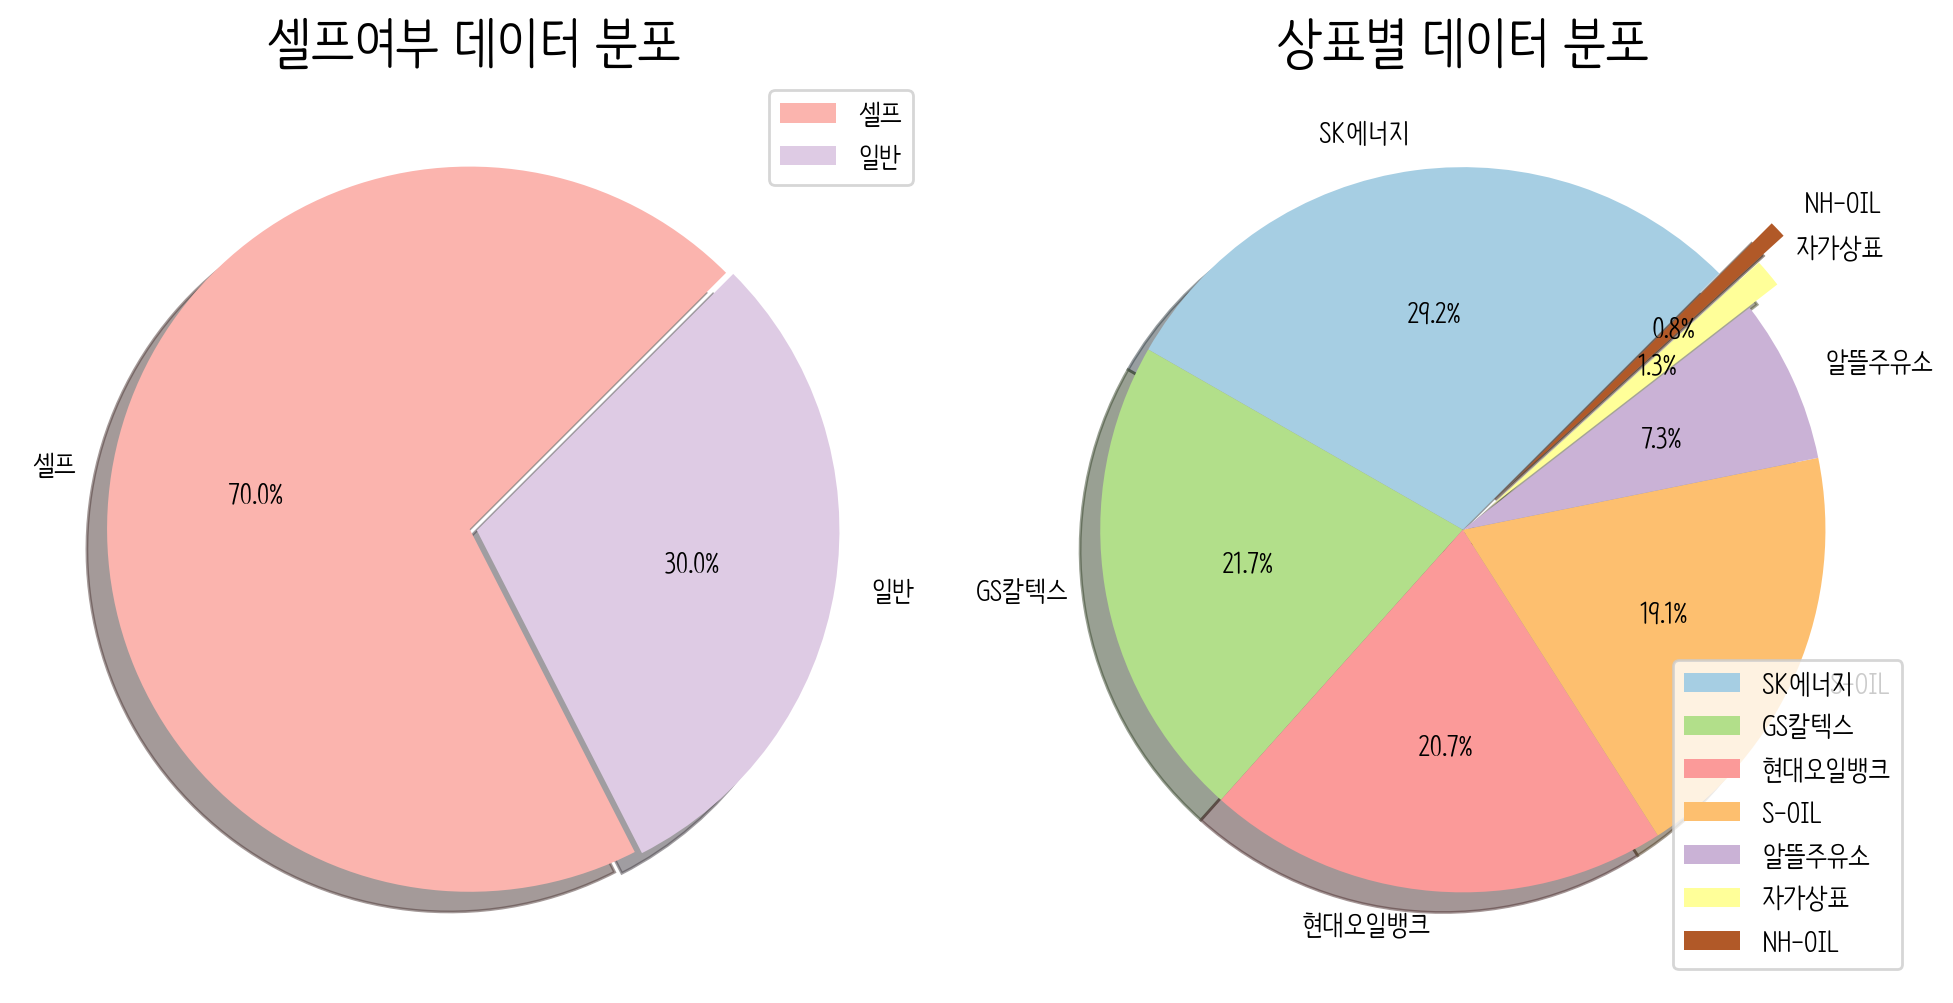

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), dpi=100, facecolor='white')

count_df = data_get[['상호','상표','셀프여부']].drop_duplicates()

size = count_df['셀프여부'].value_counts()
labels = count_df['셀프여부'].value_counts().index
colors = plt.cm.Pastel1(np.linspace(0, 1, 4))
explode = [0.01, 0.01]

ax[0].pie(size, labels=labels, colors=colors, shadow=True, startangle=45, explode=explode,autopct='%.1f%%')
ax[0].set_title('셀프여부 데이터 분포',fontsize=20)
ax[0].legend()

size = count_df['상표'].value_counts()
labels = count_df['상표'].value_counts().index
colors=plt.cm.Paired(np.linspace(0,1,count_df['상표'].value_counts().shape[0]))
explode = [0,0,0,0,0,0.1,0.2]

ax[1].pie(size, labels=labels, colors=colors, shadow=True, startangle=45, explode=explode,autopct='%.1f%%')
ax[1].set_title('상표별 데이터 분포',fontsize=20)
ax[1].legend()


plt.tight_layout()
plt.show()

#### 셀프여부

In [16]:
all_data['셀프여부'].value_counts()

셀프    279
일반    119
Name: 셀프여부, dtype: int64

<AxesSubplot:xlabel='셀프여부', ylabel='count'>

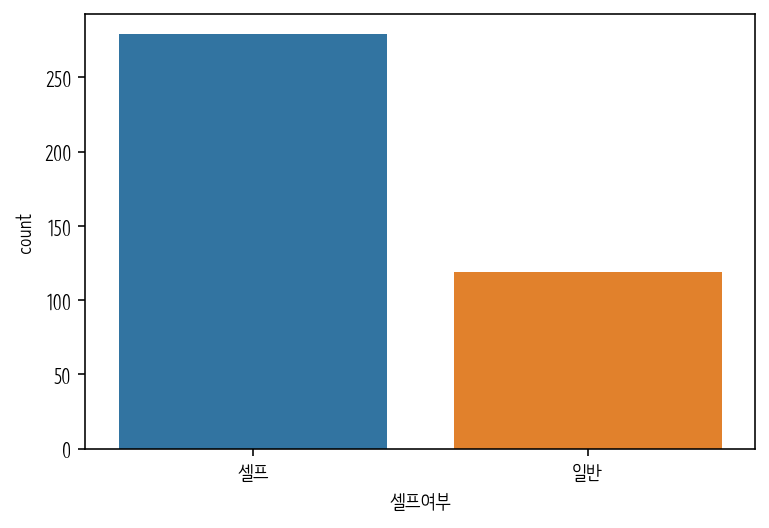

In [17]:
sns.countplot(data=all_data, x='셀프여부')

In [18]:
map = folium.Map(location=[35.160389, 129.043961], zoom_start=10)

for i in all_data.index:
    sub_lat = all_data.loc[i, '위도']
    sub_long = all_data.loc[i, '경도']
    
    title = f"{all_data.loc[i, '상호']} - {all_data.loc[i, '셀프여부']}"
    
    color = 'blue'
    if all_data.loc[i, '셀프여부'] == '일반':
        color = 'orange'

    
    folium.CircleMarker(location=[sub_lat, sub_long],
                        radius=2,
                        color=color,
                        tooltip=title).add_to(map)
map

#### 상표별

In [19]:
map = folium.Map(location=[35.160389, 129.043961], zoom_start=10)

for i in all_data.index:
    sub_lat = all_data.loc[i, '위도']
    sub_long = all_data.loc[i, '경도']
    
    tooltip = f"{all_data['상호'].iloc[i]} - {all_data['상표'].iloc[i]}"
    # iframe = folium.IFrame(f"{all_data['상호'].iloc[i]} <br> {all_data['상표'].iloc[i]}")
    # popup = folium.Popup(iframe, min_width=200, max_width=100)
    
    color = 'purple'
    if all_data.loc[i, '상표'] == 'SK에너지':
        color = 'red'
    if all_data.loc[i, '상표'] == 'GS칼텍스':
        color = 'green'
    if all_data.loc[i, '상표'] == '현대오일뱅크':
        color = 'blue'
    if all_data.loc[i, '상표'] == 'S-OIL':
        color = 'yellow'
    if all_data.loc[i, '상표'] == '알뜰주유소':
        color = 'orange'
    if all_data.loc[i, '상표'] == '자가상표':
        color = 'black'
    
    folium.Marker(location=[sub_lat, sub_long],
                        icon=folium.Icon(color=color,icon='tint'), tooltip=tooltip).add_to(map)
map

C:\Users\admin\AppData\Local\Temp\ipykernel_13744\1206878070.py:26: UserWarning: color argument of Icon should be one of: {'darkblue', 'lightgreen', 'white', 'blue', 'darkred', 'cadetblue', 'green', 'purple', 'lightred', 'red', 'pink', 'beige', 'black', 'orange', 'darkgreen', 'gray', 'lightblue', 'darkpurple', 'lightgray'}.
  icon=folium.Icon(color=color,icon='tint'), tooltip=tooltip).add_to(map)










####  네이버 검색량

In [20]:
data_N = pd.read_excel('./data/naver-2022-8-12-기름값.xlsx')
data_N

,기름값 Total 64,검색량,총클릭수,트렌드,문서수,비율,포스팅순위,첫번째 섹션,두번째 섹션
0,기름값,214300,8,-6.91,11556,0.05,NaN,플레이스,뉴스
1,국제유가,1334100,744,9.83,11167,0.01,NaN,증권정보,뉴스
2,주유소기름값,11100,0,11.59,1362,0.12,NaN,플레이스,뉴스
3,기름값인하,17940,0,-6.78,818,0.05,NaN,뉴스,지식iN
4,기름값싼곳,12850,0,359.51,522,0.04,NaN,플레이스,VIEW
...,...,...,...,...,...,...,...,...,...
59,미국기름값폭등,20,0,0.00,222,11.10,NaN,통합,VIEW
60,미국기름값추이,20,0,0.00,59,2.95,NaN,동영상,VIEW
61,미국기름값2022,20,0,0.00,475,23.75,NaN,통합,VIEW
62,한국미국기름값차이,20,0,0.00,141,7.05,NaN,VIEW,동영상


In [21]:
columns = ['기름값 Total 64', '검색량']
data_N = data_N[columns].copy()
data_N.rename(columns={'기름값 Total 64' : '키워드'}, inplace=True)
data_N.head()

,키워드,검색량
0,기름값,214300
1,국제유가,1334100
2,주유소기름값,11100
3,기름값인하,17940
4,기름값싼곳,12850


#### 유튜브 검색량

In [22]:
data_Y = pd.read_excel('./data/youtube2022-8-12-기름 값.xlsx')
data_Y

,기름 값 Total 79,검색량,영상수,비율,트렌드
0,기름 값,8100,167526,20.68,-33.11
1,기름 값 오르는 이유,880,1225,1.39,-68.95
2,기름 값 전망,480,3751,7.82,-44.62
3,기름 값 인하,590,1912,3.24,0.00
4,기름 값 폭등,90,1472,16.36,-58.82
...,...,...,...,...,...
74,원유 가격 전망,320,3408,10.65,-33.33
75,국제 유가 전망 2021,110,790,7.18,-66.67
76,100km 기름 값,110,366,3.33,0.00
77,기름 값 싼곳,50,52,1.04,75.00


In [23]:
columns = ['기름 값 Total 79', '검색량']
data_Y = data_Y[columns].copy()
data_Y.rename(columns={'기름 값 Total 79' : '키워드'}, inplace=True)
data_Y.head()

,키워드,검색량
0,기름 값,8100
1,기름 값 오르는 이유,880
2,기름 값 전망,480
3,기름 값 인하,590
4,기름 값 폭등,90


#### 네이버 검색량/ 유튜브 검색량 csv파일 합치기

In [24]:
data = pd.concat([data_N, data_Y], ignore_index=True)
data

,키워드,검색량
0,기름값,214300
1,국제유가,1334100
2,주유소기름값,11100
3,기름값인하,17940
4,기름값싼곳,12850
...,...,...
138,원유 가격 전망,320
139,국제 유가 전망 2021,110
140,100km 기름 값,110
141,기름 값 싼곳,50


#### DataFrame -> dic으로 변환

In [25]:
data = data.set_index('키워드').to_dict()['검색량']
data

{'기름값': 214300,
 '국제유가': 1334100,
 '주유소기름값': 11100,
 '기름값인하': 17940,
 '기름값싼곳': 12850,
 '기름값계산기': 25160,
 '기름값계산': 3790,
 '구미기름값': 4860,
 '기름값전망': 4070,
 '대구기름값': 5930,
 '부산기름값': 3880,
 '100KM기름값': 2380,
 '기름값계산기네이버': 4300,
 '유류': 4080,
 '연료비': 500,
 '미국기름값': 2780,
 '기름': 7450,
 '교통비': 6160,
 '식비': 4130,
 '지불하다': 1330,
 '유지비': 430,
 '기름값비교사이트': 20,
 '기름값싼주유소': 100,
 '기름값인하시기': 20,
 '기름값인상': 490,
 '기름값오르는이유': 120,
 '기름값할인카드': 340,
 '기름값추이': 590,
 '기름값인상이유': 180,
 '기름값3000원': 30,
 '기름값세금': 150,
 '미국기름값리터당': 20,
 '기름값계산법': 40,
 '기름값시세': 260,
 '주행거리기름값계산': 30,
 '미국기름값오르는이유': 20,
 '기름값오르는이유러시아': 20,
 '거리기름값계산': 70,
 '기름값톨비계산': 20,
 '한달기름값계산': 20,
 '쏘카기름값계산': 20,
 '미국기름값계산': 20,
 '기름값인하유류세': 20,
 '기름값인하이유': 180,
 '유류비계산기름값': 20,
 '여행기름값계산': 30,
 '기름값인하효과': 20,
 '11월기름값인하': 20,
 '국내기름값추이': 20,
 '최근기름값인하': 20,
 '기름값상승이유': 60,
 '기름값변동추이': 20,
 '기름값상승률': 20,
 '기름값상승세': 20,
 '기름값상승해결방안': 20,
 '기름값상승주식': 20,
 '기름값상승원인': 40,
 '기름값상승물가': 20,
 '미국기름값2021': 20,
 '미국기름값폭등': 20,
 '미국기름값추이': 20,
 '미국기름값20

#### 검색량 bar차트로 나타내기

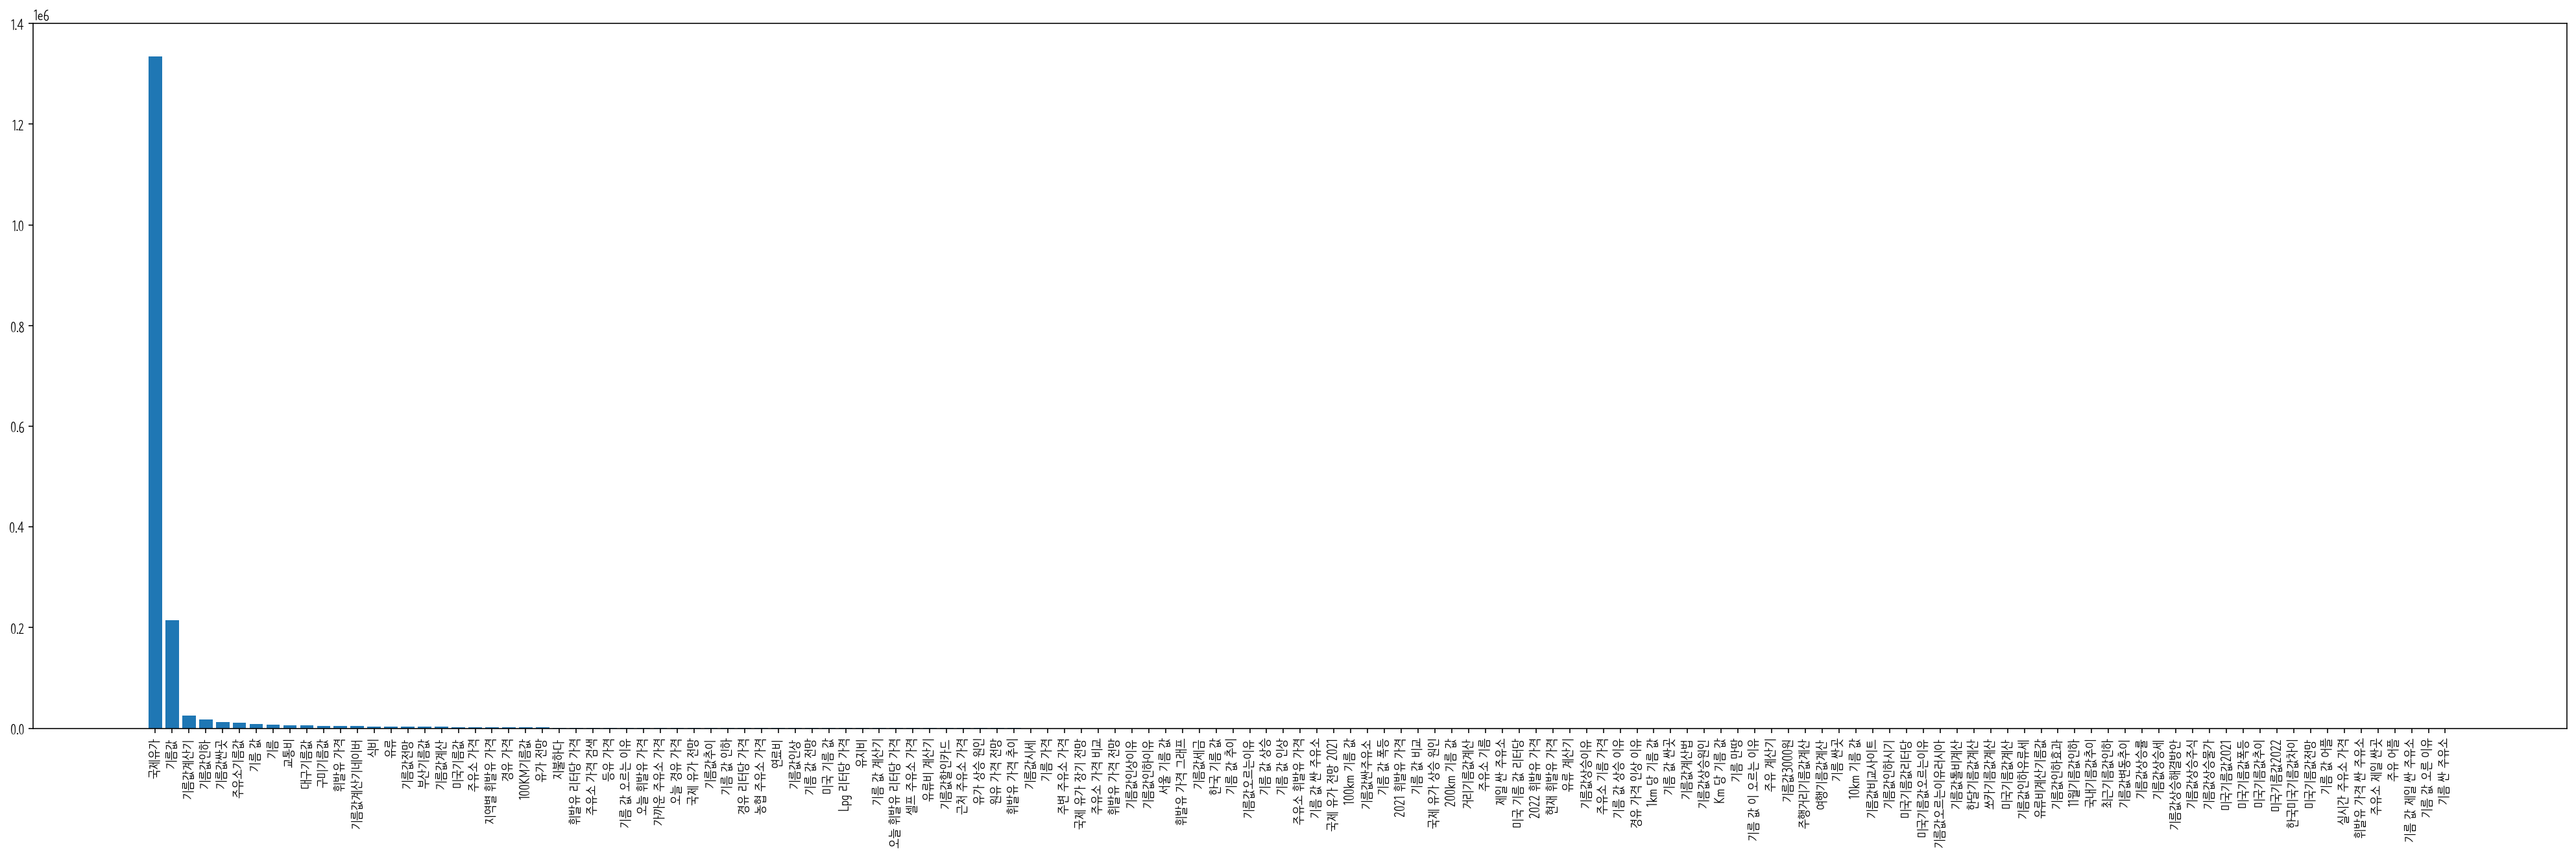

In [26]:
# 단어개수 차트
sorted_keys = sorted(data, key=data.get, reverse=True)
sorted_values = sorted(data.values(), reverse=True)

plt.figure(figsize=(35,10))
plt.bar(range(len(data)), sorted_values, align='center')
plt.xticks(range(len(data)), list(sorted_keys), rotation=90)
plt.show()

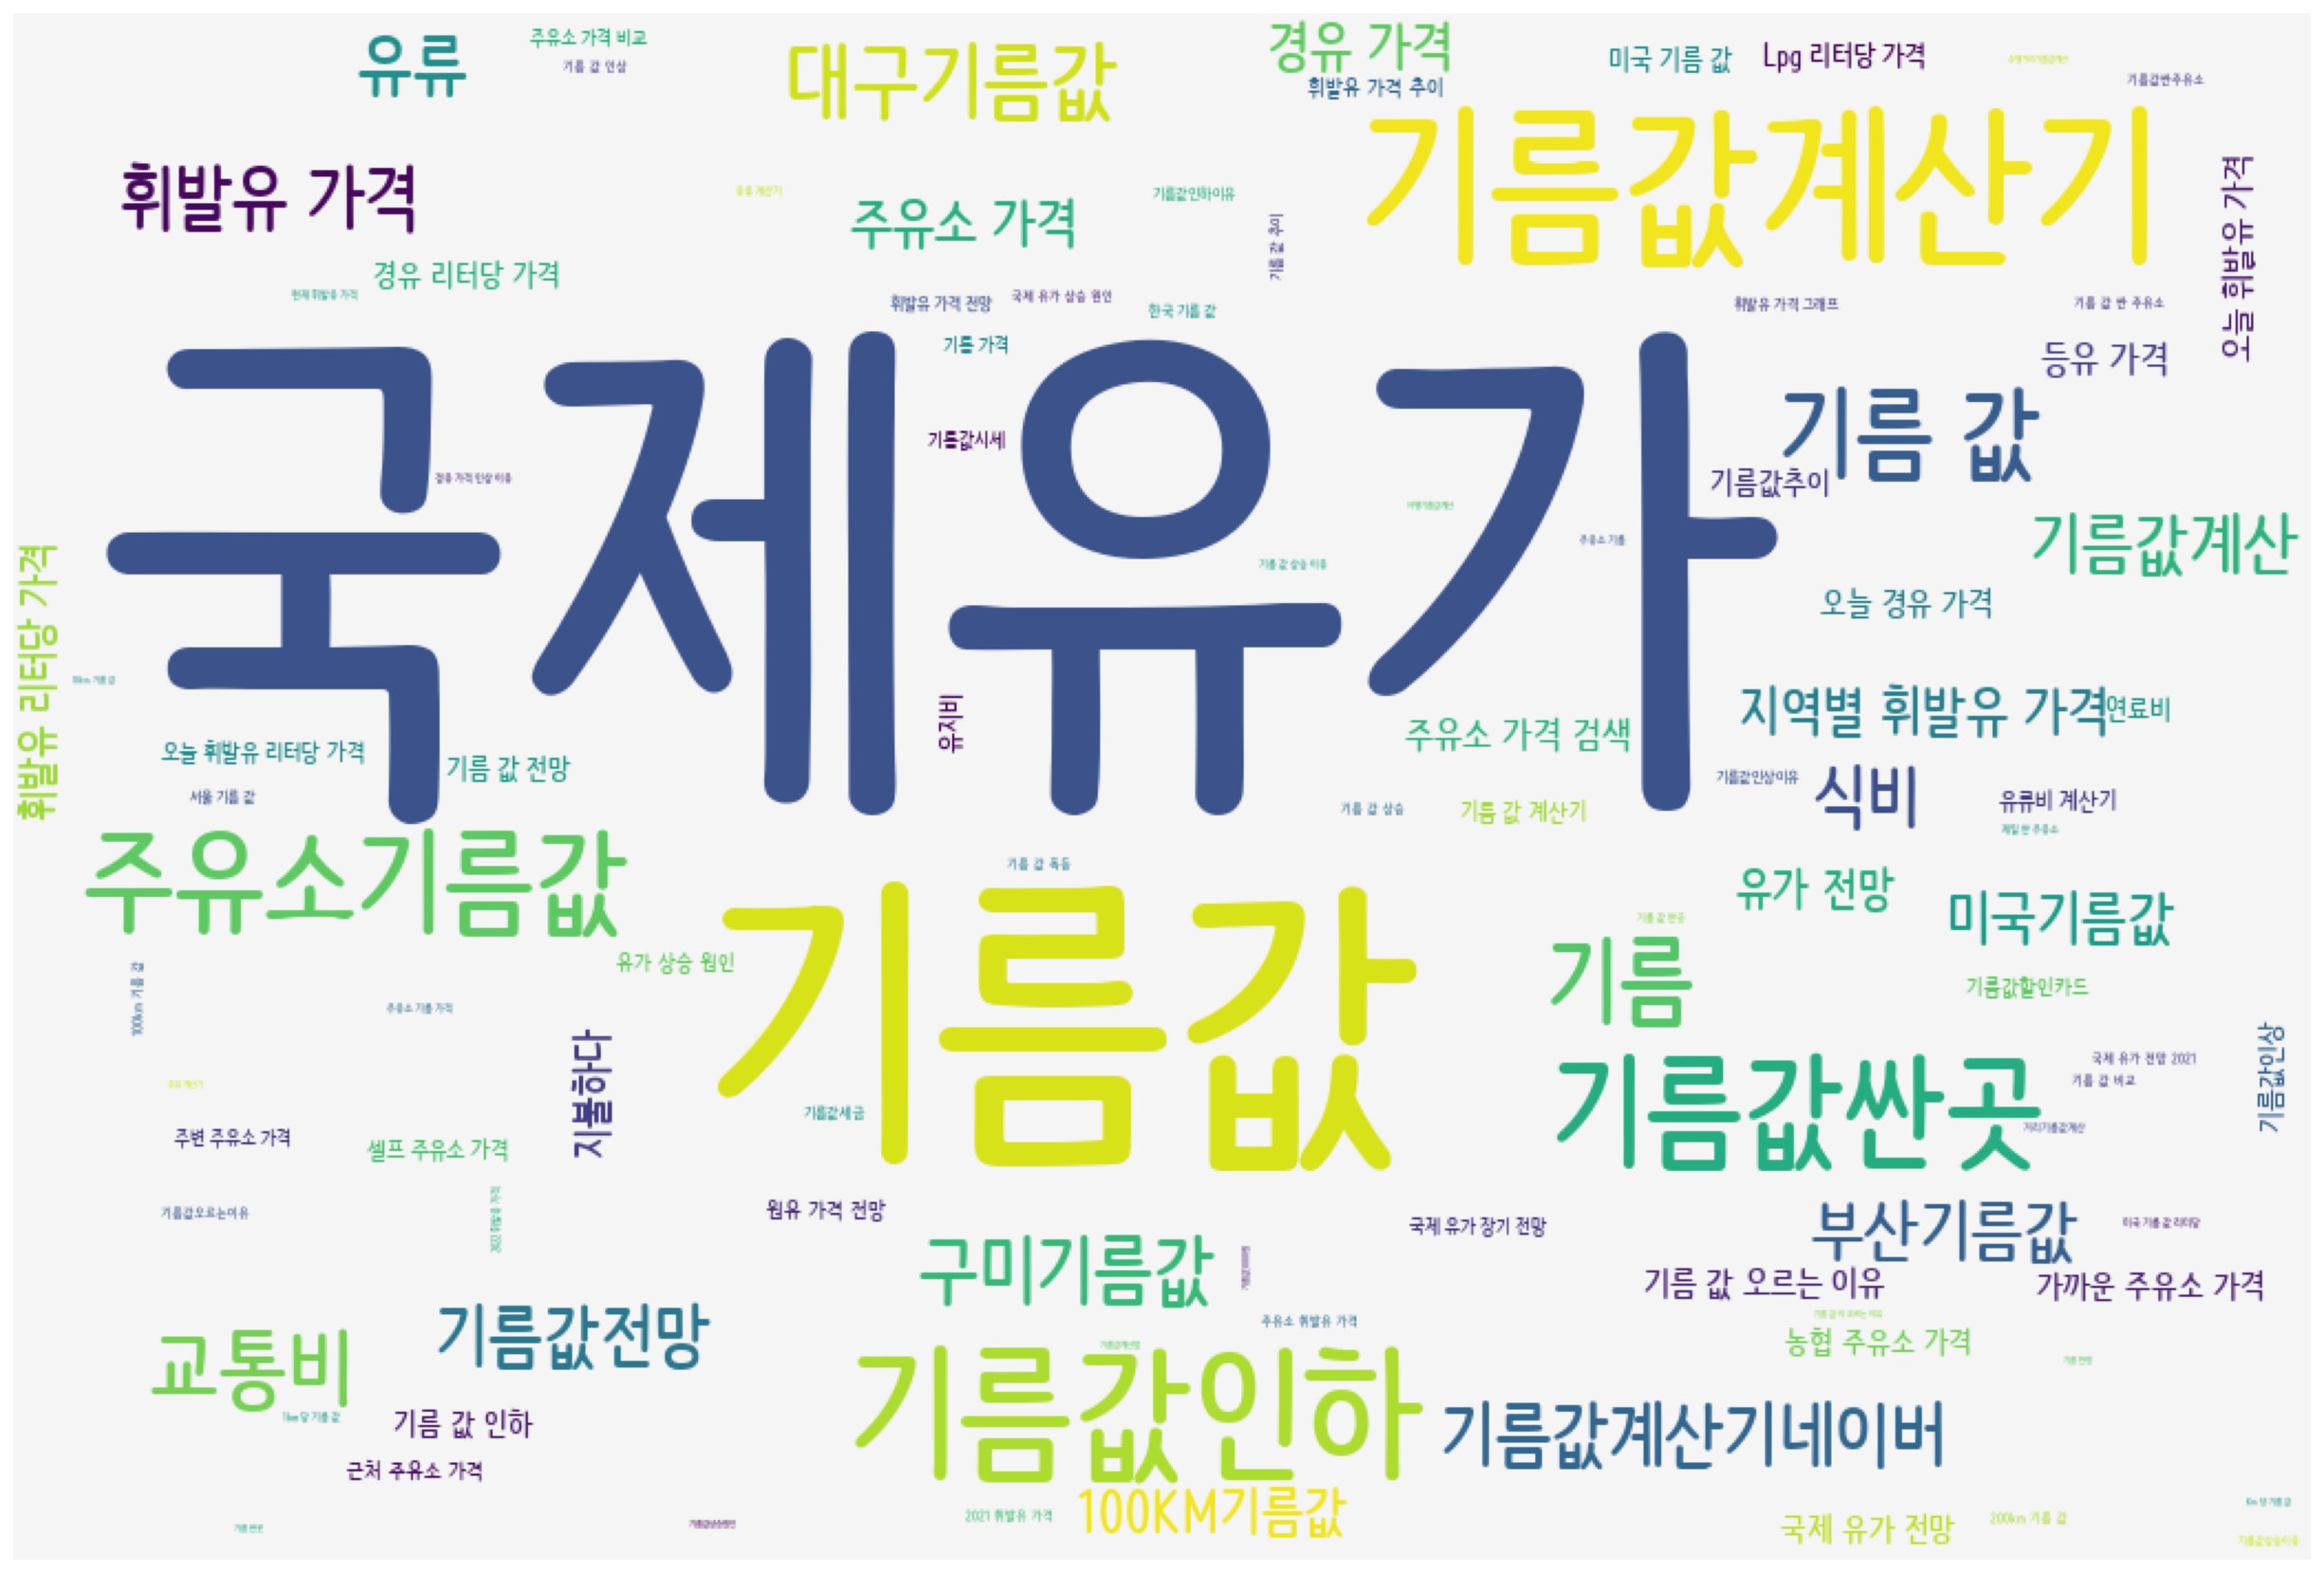

In [27]:
wc = WordCloud(font_path=font_path, background_color='#f5f5f5', width=1040, height=700)
cloud = wc.generate_from_frequencies(data)

plt.figure(figsize=(40,15))
plt.imshow(cloud)
plt.axis('off')
plt.show()

#### 검색량이 가장 많은 단어 **국제유가**에 대해 알아보자!

In [34]:
def get_oil_price(code):
    
    """
        Description
        -----------
        네이버 금융 - NAVER
        
        Input
        -----
        code : OIL_DU(두바이유), OIL_CL(WTI), OIL_BRT(브렌트유)
        
        Output
        ------
        일별 유가(종가)
        
        Example
        -------
        oil_price_du = get_oil_price('OIL_DU')
        
    """
    
    delay = 0.01
    page = 1
    result = []
    start_time = datetime.now()
    
    # 수집
    print('[{}] 데이터 수집을 시작합니다. (code: {})'.format(start_time.strftime('%Y/%m/%d %H:%M:%S'), code))
    while(True):
        url = 'https://finance.naver.com/marketindex/worldDailyQuote.nhn?marketindexCd={}&fdtc=2&page={}'.format(code, page)
        data = pd.read_html(url)[0].dropna()
        if page != 1:
            try:
                if data.iloc[-1, 0] == result[-1].iloc[-1, 0]:
                    break
            except:
                break
        result.append(data)
        page += 1
        if page == 20:
            break
        time.sleep(delay)
    
    # 가공
    oil_price = pd.concat(result).reset_index(drop=True)
    oil_price.columns = ['날짜', '종가', '전일대비', '등락율']
    oil_price['날짜'] = oil_price['날짜'].apply(lambda x: datetime.strptime(x, '%Y.%m.%d'))
    oil_price = oil_price[['날짜', '종가']]
    oil_price.insert(0, '코드', code)
    
    end_time = datetime.now()
    print('[{}] 데이터 수집을 종료합니다. (code: {}, 수집시간: {}초, 데이터수: {:,}개)'.format(end_time.strftime('%Y/%m/%d %H:%M:%S'), code, (end_time-start_time).seconds, len(oil_price)))
    return oil_price

In [35]:
# 두바이유
oil_price_du = get_oil_price('OIL_DU')

[2022/08/17 17:07:28] 데이터 수집을 시작합니다. (code: OIL_DU)
[2022/08/17 17:07:30] 데이터 수집을 종료합니다. (code: OIL_DU, 수집시간: 1초, 데이터수: 133개)


In [36]:
du = oil_price_du[['날짜','종가']]
du.columns = ['날짜','두바이_종가']
du

,날짜,두바이_종가
0,2022-08-16,93.46
1,2022-08-15,94.97
2,2022-08-12,96.48
3,2022-08-11,98.18
4,2022-08-10,96.87
...,...,...
128,2022-02-10,89.92
129,2022-02-09,89.88
130,2022-02-08,89.28
131,2022-02-07,90.76


#### 두바이유 가격 저장

In [37]:
import pandas as pd

In [38]:
du.to_csv("./data/국제유가(두바이)_주말제거.csv", encoding="utf-8", index=False)

In [39]:
# 서부텍사스유
oil_price_wti = get_oil_price('OIL_CL')

[2022/08/17 17:07:30] 데이터 수집을 시작합니다. (code: OIL_CL)
[2022/08/17 17:07:32] 데이터 수집을 종료합니다. (code: OIL_CL, 수집시간: 1초, 데이터수: 133개)


In [40]:
wti = oil_price_wti[['날짜','종가']]
wti.columns = ['날짜','wti_종가']
wti

,날짜,wti_종가
0,2022-08-16,86.53
1,2022-08-15,89.41
2,2022-08-12,92.09
3,2022-08-11,94.34
4,2022-08-10,91.93
...,...,...
128,2022-02-10,89.88
129,2022-02-09,89.66
130,2022-02-08,89.36
131,2022-02-07,91.32


In [41]:
# 브렌트유
oil_price_brent = get_oil_price('OIL_BRT')

[2022/08/17 17:07:32] 데이터 수집을 시작합니다. (code: OIL_BRT)
[2022/08/17 17:07:34] 데이터 수집을 종료합니다. (code: OIL_BRT, 수집시간: 1초, 데이터수: 133개)


In [42]:
brent = oil_price_brent[['날짜','종가']]
brent.columns = ['날짜','브렌트_종가']
brent

,날짜,브렌트_종가
0,2022-08-16,92.34
1,2022-08-15,95.10
2,2022-08-12,98.15
3,2022-08-11,99.60
4,2022-08-10,97.40
...,...,...
128,2022-02-16,94.81
129,2022-02-15,93.28
130,2022-02-14,96.48
131,2022-02-11,94.44


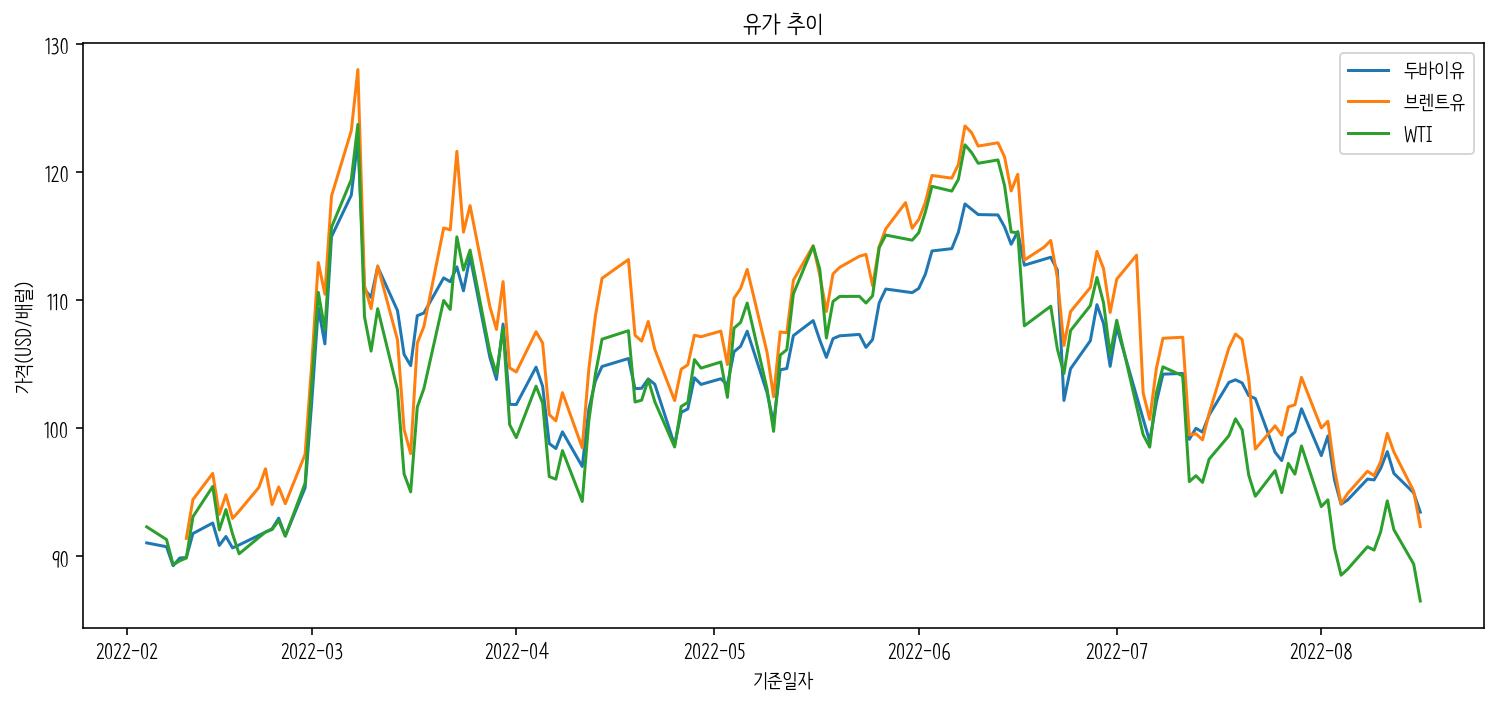

In [43]:
plt.figure(figsize=(10.5,5))
plt.plot(oil_price_du['날짜'], oil_price_du['종가'], label='두바이유')
plt.plot(oil_price_brent['날짜'], oil_price_brent['종가'], label='브렌트유')
plt.plot(oil_price_wti['날짜'], oil_price_wti['종가'], label='WTI')

plt.title('유가 추이')
plt.xlabel('기준일자')
plt.ylabel('가격(USD/배럴)')
plt.legend()
plt.tight_layout()
plt.show()